# Tutorial: Core Functionalities of the `gwmat.injection` Module

In [1]:
#!/home/anuj.mishra/anaconda3/envs/igwn-py39/bin/python3

import numpy as np
from time import time

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
mpl.rcParams['figure.figsize'] = (7.0, 5.0)
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = 18
mpl.rcParams['xtick.labelsize'] = 18.0
mpl.rcParams['ytick.labelsize'] = 18.0
mpl.rcParams['lines.markersize'] = 10.0
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Computer Modern'

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import gwmat

lal.MSUN_SI != Msun
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new


## 1. Documentation

In [2]:
# Replace `injection` with the specific class you want to check
cls = gwmat.injection.__class__
mro = cls.__mro__
# Get the documentation of the first class in the MRO
cbc_injection_doc = mro[0].__doc__
print(cbc_injection_doc)


        This class contains functions for injecting gravitational wave (GW) signals from
        compact binary coalescences (CBCs), both microlensed and unlensed, with or without
        noise. It also provides functions for signal-to-noise ratio (SNR) computations,
        distance estimates from SNR, and related tasks.

        Parameters for generating simulated signals accept any key compatible with PyCBC.
        Lensing-specific parameters can be added when generating microlensed signals.
        Additional parameters may be useful for injections and saving them as frame files.

        While all PyCBC parameters are valid, the following dictionary templates provide
        the typical structure for generating injections:

        - `init_params`: Initialization parameters for waveform generation. This dictionary
          varies based on whether the waveform is generated in the time domain (TD) or
          frequency domain (FD).
        - `lens_params`: Parameters specific to

## 2. Generating h_plus and h_cross polarization modes for a binary system (we choose GW150914-like system)
Generating pure polarised Wfs using the function `gwmat.injection.generate_gw_polarizations_hp_hc`.

In [3]:
# maxL params obtained from `IGWN-GWTC2p1-v2-GW150914_095045_PEDataRelease_mixed_cosmo.h5` 
# using `C01:Mixed` sample key. 
# You may see the commented code below to find out how these parameters were obtained.
gw150914_params = {
    "mass_1" :  36.899196999999994,
    "mass_2" :  32.841122,
    "a_1" :  0.4589379196155383,
    "a_2" :  0.6217996075936105,
    "tilt_1" :  1.3119020553581624,
    "tilt_2" :  1.9677689908003024,
    "phi_jl" :  5.066189795720256,
    "phi_12" :  2.35369776837124,
    "ra" :  1.6894226000000003,
    "dec" :  -1.2408674,
    "psi" :  1.205441068972152,
    "phase" :  3.719825515003542,
    "luminosity_distance" :  402.60244,
    "theta_jn" :  2.74767078690558,
    "geocent_time":  1126259462.426434,
} # in J-frame.

In [4]:
# # The above parameters were obtained using the following code snippet. 
# # You DO NOT need to run this, unless you want to.

# # First, download GW150914 data file form here: 
# # https://zenodo.org/records/6513631/files/IGWN-GWTC2p1-v2-GW150914_095045_PEDataRelease_mixed_cosmo.h5?download=1

# import pesummary
# from pesummary.io import read
# df = read("IGWN-GWTC2p1-v2-GW150914_095045_PEDataRelease_mixed_cosmo.h5")
# samples = df.samples_dict
# posterior = samples["C01:Mixed"]
# print("\nMaxL Values of GW150914:\n")

# maxL_indx = np.argmax(posterior["log_likelihood"])
# params_maxL = dict()
# for key in ['mass_1', 'mass_2', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_jl', 'phi_12', 
#             'ra', 'dec', 'psi', 'phase', 'luminosity_distance', 'theta_jn','geocent_time']:
#     val = posterior[key][maxL_indx]
#     params_maxL[key] = np.float64(val)
# print(params_maxL)

# # Extracting GW150914 PSD and saving it in a file
# for ifo in ["H1", "L1"]:
#     tmp_psd = np.asarray(df.psd["C01:IMRPhenomXPHM"][ifo])
#     # Ensure that the end frequency of the PSD is an integer value.
#     tmp_psd = np.concatenate((tmp_psd, [[np.ceil(tmp_psd[-1][0]), tmp_psd[-1][1] ]]))
#     np.savetxt("gw150914_"+ifo+"_psd.txt", tmp_psd)
# gw150914_params = params_maxL

### (i) Unlensed WF Generation
- The default setting is to generate the unlensed wavaeforms. 
- By default, `wf_domain="TD"`, which uses PyCBC's `get_td_waveform` instead of `get_fd_waveform`. The time-domain (`"TD"`) option is the default because manually converting from frequency-domain to time-domain, even with models like `"IMRPhenomXO4a"`, can sometimes produce inaccurate results, whereas time-domain to frequency-domain conversion tends to be more reliable. Since simulated injections are typically needed in the time domain (e.g., for saving as frame files), `"TD"` is preferred. To explicitly generate waveforms in the frequency domain, set `wf_domain="FD"` or `"frequency-domain"`.


Output of `generate_gw_polarizations_hp_hc`:
hp_TD_Unlensed : <pycbc.types.timeseries.TimeSeries object at 0x7facc114b5b0>
hc_TD_Unlensed : <pycbc.types.timeseries.TimeSeries object at 0x7fad640e1940>
hp_FD_Unlensed : <pycbc.types.frequencyseries.FrequencySeries object at 0x7facc114b520>
hc_FD_Unlensed : <pycbc.types.frequencyseries.FrequencySeries object at 0x7facc113c8e0>




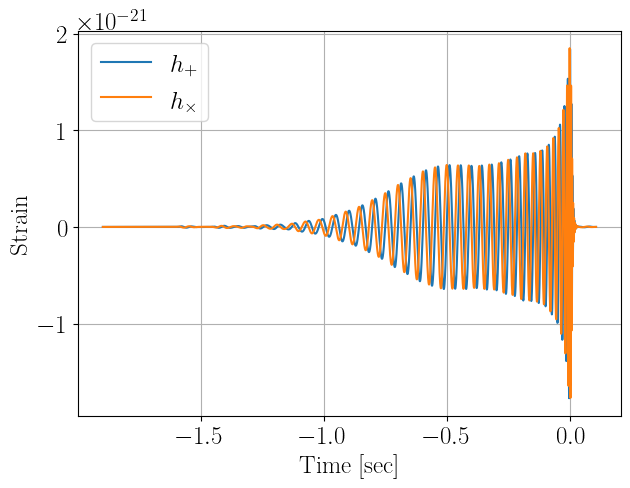

In [5]:
init_params = dict(wf_domain="TD", f_start=20, f_ref=20., sample_rate=4096, 
                   delta_t=None, wf_approximant="IMRPhenomXO4a")
cbc_params =  gw150914_params 
misc_params = dict(rwrap = -0., cyclic_time_shift_method = "pycbc",
                   taper_hp_hc=True,  hp_hc_extra_padding_at_start=0,
                   make_hp_hc_duration_power_of_2=True)
params = {**init_params, **cbc_params, **misc_params}

## WF generation
res = gwmat.injection.generate_gw_polarizations_hp_hc(**params)
print("\nOutput of `generate_gw_polarizations_hp_hc`:")
gwmat.general_utils.print_dict(res)
print("\n")

# Plot
wf = res['hp_TD_Unlensed']
plt.plot(wf.sample_times, wf, linestyle='-', label='$h_+$')
wf = res['hc_TD_Unlensed']
plt.plot(wf.sample_times, wf, linestyle='-', label=r'$h_\times$')
plt.xlabel('Time [sec]')
plt.ylabel('Strain')
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [6]:
gwmat.injection.params

{'snr_f_min': 20.0,
 'snr_f_max': 2048.0,
 'f_ref': 20.0,
 'sample_rate': 4096,
 'delta_t': 0.000244140625,
 'delta_f': None,
 'ifo_list': ['H1', 'L1', 'V1'],
 'm_lens': 0.0,
 'y_lens': 5.0,
 'z_lens': 0.0,
 'lens_mass_lower_limit': 0.001,
 'Ff_data': None,
 'ra': 1.6894226000000003,
 'dec': -1.2408674,
 'rwrap': -0.0,
 'wf_domain': 'TD',
 'taper_hp_hc': True,
 'hp_hc_extra_padding_at_start': 0,
 'make_hp_hc_duration_power_of_2': True,
 'extra_padding_at_start': 1.0,
 'extra_padding_at_end': 2.0,
 'Noise': False,
 'psd_H1': 'O4',
 'psd_L1': 'O4',
 'psd_V1': 'O4',
 'noise_seed': 127,
 'is_asd_file': False,
 'psd_f_low': 20.0,
 'save_data': False,
 'data_outdir': './',
 'data_label': None,
 'data_channel': 'PyCBC_Injection',
 'cyclic_time_shift_method': 'pycbc',
 'f_start': 20,
 'wf_approximant': 'IMRPhenomXO4a',
 'mass_1': 36.899196999999994,
 'mass_2': 32.841122,
 'a_1': 0.4589379196155383,
 'a_2': 0.6217996075936105,
 'tilt_1': 1.3119020553581624,
 'tilt_2': 1.9677689908003024,
 'phi_

#### Sometimes the waveform can be wrapped by default. Use `rwrap` parameter to rectify that.

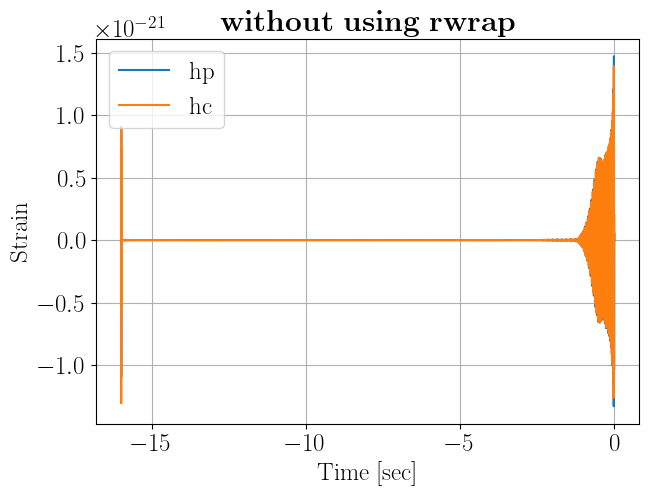

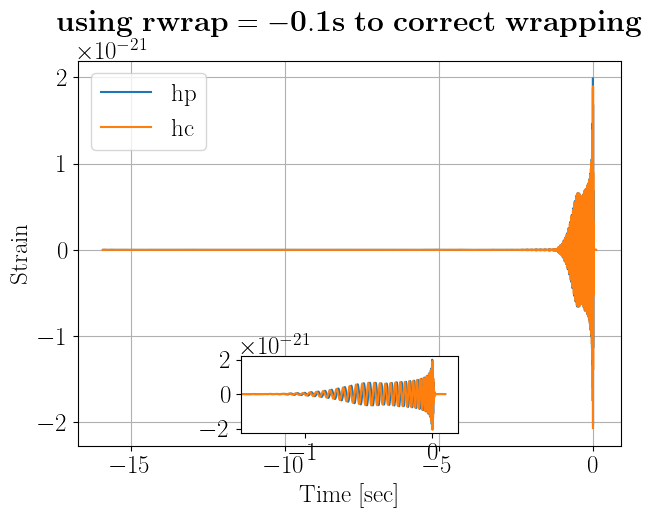

In [7]:
## without rwrap
params.update(rwrap = 0.0, wf_approximant="IMRPhenomXPHM")
res1 = gwmat.injection.generate_gw_polarizations_hp_hc(**params)

## with rwrap
params.update(rwrap = -0.1, wf_approximant="IMRPhenomXPHM")
res2 = gwmat.injection.generate_gw_polarizations_hp_hc(**params)

# Plot
wf = res1['hp_TD_Unlensed']
plt.plot(wf.sample_times, wf, linestyle='-', label='hp')
wf = res1['hc_TD_Unlensed']
plt.plot(wf.sample_times, wf, linestyle='-', label='hc')
plt.xlabel('Time [sec]')
plt.ylabel('Strain')
plt.legend(loc="upper left")
plt.title("$\mathbf{without~using~rwrap}$")
plt.grid()
plt.show()

wf = res2['hp_TD_Unlensed']
plt.plot(wf.sample_times, wf, linestyle='-', label='hp')
wf = res2['hc_TD_Unlensed']
plt.plot(wf.sample_times, wf, linestyle='-', label='hc')
plt.xlabel('Time [sec]')
plt.ylabel('Strain')
plt.legend(loc="upper left")
plt.title("$\mathbf{using~rwrap=-0.1s~to~correct~wrapping}$")
plt.grid()


# Create inset axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax_inset = inset_axes(plt.gca(), width="40%", height="20%", loc='lower center')  # Adjust width and height as needed
# Inset plot
wf_inset = res2['hp_TD_Unlensed']  # Adjust this if you want to plot something else in the inset
ax_inset.plot(wf_inset.sample_times, wf_inset)
wf_inset = res2['hc_TD_Unlensed']  # Adjust this if you want to plot something else in the inset
ax_inset.plot(wf_inset.sample_times, wf_inset)
# Set limits for inset plot
ax_inset.set_xlim(-1.5, 0.2)

plt.show()

### (ii) Microlensed WF generation
- Now we will add microlensing effect to the h_plus and h_cross polarizations modes.
- To achieve that, one can pass the point-mass microlens parameters to the waveform generator funciton (as shown below). One can also  provide the amplification factor F(f) data explicitly, which might be helpful if F(f) is being generated independently for complicated lens models.
- For better visualization, we choose `f_start/f_lower=15 Hz`.

output of `generate_gw_polarizations_hp_hc`:
hp_TD_Unlensed : <pycbc.types.timeseries.TimeSeries object at 0x7facb8d21460>
hc_TD_Unlensed : <pycbc.types.timeseries.TimeSeries object at 0x7facb8d21700>
hp_FD_Unlensed : <pycbc.types.frequencyseries.FrequencySeries object at 0x7facb8d215b0>
hc_FD_Unlensed : <pycbc.types.frequencyseries.FrequencySeries object at 0x7facb8d21220>
hp_FD_Lensed : <pycbc.types.frequencyseries.FrequencySeries object at 0x7facb8b08c70>
hc_FD_Lensed : <pycbc.types.frequencyseries.FrequencySeries object at 0x7facb8d21130>
hp_TD_Lensed : <pycbc.types.timeseries.TimeSeries object at 0x7facb8d80070>
hc_TD_Lensed : <pycbc.types.timeseries.TimeSeries object at 0x7facb8d80160>




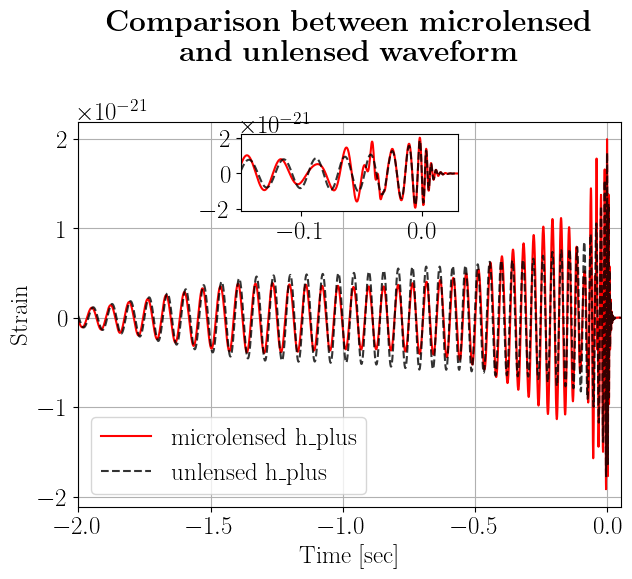

In [8]:
init_params = dict(wf_domain="TD", f_start=15, f_ref=20., sample_rate=4096, 
                   delta_t=None, wf_approximant="IMRPhenomXO4a")
lens_params = dict(m_lens=1e3, y_lens=1) # THESE ARE LENS PARAMETERS
cbc_params =  gw150914_params 
misc_params = dict(rwrap = -0., cyclic_time_shift_method = "pycbc",
                   taper_hp_hc=True,  hp_hc_extra_padding_at_start=0,
                   make_hp_hc_duration_power_of_2=True)
params = {**init_params, **cbc_params, **lens_params, **misc_params}

res = gwmat.injection.generate_gw_polarizations_hp_hc(**params)
print("output of `generate_gw_polarizations_hp_hc`:")
gwmat.general_utils.print_dict(res)
print("\n")

# Plot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Main plot
wf = res['hp_TD_Lensed']
plt.plot(wf.sample_times, wf, color='red', linestyle='solid', label='microlensed h_plus')
wf = res['hp_TD_Unlensed']
plt.plot(wf.sample_times, wf, color='black', linestyle='--', label='unlensed h_plus', alpha=0.8)

plt.xlabel('Time [sec]')
plt.ylabel('Strain')
plt.legend(loc="lower left")
plt.title("$\mathbf{Comparison~between~microlensed}$\n$\mathbf{~and~unlensed~waveform}$\n")
plt.grid()
plt.xlim(-2, 0.05)

# Create inset axes
ax_inset = inset_axes(plt.gca(), width="40%", height="20%", loc='upper center')  # Adjust width and height as needed
# Inset plot
wf_inset = res['hp_TD_Lensed']  # Adjust this if you want to plot something else in the inset
ax_inset.plot(wf_inset.sample_times, wf_inset, color='red', linestyle='solid')
wf_inset = res['hp_TD_Unlensed']  # Adjust this if you want to plot something else in the inset
ax_inset.plot(wf_inset.sample_times, wf_inset, color='black', linestyle='--', alpha=0.8)
# Set limits for inset plot
ax_inset.set_xlim(-0.15, 0.03)
plt.show()

## 3. Generating injection frame files and related data in the projected O4 PSD.
- We will use `gwmat.injection.simulate_injection_with_comprehensive_output`, which produces all the relavant output.
- Below we show all the outputs and their visualization.
- We use f_strat/f_lower=15 Hz and a different sky position than that of GW150914 (as L1 and V1 have very similar\
projections for that), for better visualization
- NOTE: The key values `snr_f_min` and `snr_f_max` set the frequency range for computing the SNR.

In [9]:
init_params = dict(wf_domain="TD", f_start=15, snr_f_min=20., snr_f_max=None,
            f_ref=20., sample_rate=2048, delta_t=None, wf_approximant="IMRPhenomXO4a",
            ifo_list = ['H1', 'L1', 'V1']) # when wf_domain="TD"
lens_params = dict(m_lens=0., y_lens=5., z_lens=0.,
                   lens_mass_lower_limit=1.e-3, Ff_data=None)
cbc_params =  gw150914_params
misc_params = dict(rwrap = -0.1, cyclic_time_shift_method = "gwmat",
                   taper_hp_hc=True,  hp_hc_extra_padding_at_start=0,
                   make_hp_hc_duration_power_of_2=True,
                   extra_padding_at_start=1, extra_padding_at_end=2,
                   save_data=False, data_outdir = './',
                   data_label=None, data_channel='PyCBC-Injection')
psd_params = dict(Noise=True, psd_H1="O4", psd_L1="O4", psd_V1="O4", 
                  noise_seed=127, is_asd_file=False, psd_f_low=None)

params = {**init_params, **cbc_params, **lens_params, **psd_params, **misc_params}

params.update(ra=0, dec=0.7)

## WF generation
res = gwmat.injection.simulate_injection_with_comprehensive_output(**params)
print("\nOutput of `simulate_injection_with_comprehensive_output`:\n")
print("Keys:", res.keys())
print("\nOutput:")
gwmat.general_utils.print_dict(res)
print("\n")


Output of `simulate_injection_with_comprehensive_output`:

Keys: dict_keys(['pure_polarized_wfs', 'pure_ifo_signal', 'noisy_ifo_signal', 'psd', 'signal_templates', 'matched_filter_snr', 'optimal_snr', 'network_optimal_snr', 'matched_filter_snr_timeseries', 'network_matched_filter_snr'])

Output:
pure_polarized_wfs : {'hp': <pycbc.types.timeseries.TimeSeries object at 0x7facb8a22ca0>, 'hc': <pycbc.types.timeseries.TimeSeries object at 0x7facb8a22d30>}
pure_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7facb8a229a0>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7facb8a22c40>, 'V1': <pycbc.types.timeseries.TimeSeries object at 0x7facb8a22c70>}
noisy_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7facb8b08520>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7facb8cfa2e0>, 'V1': <pycbc.types.timeseries.TimeSeries object at 0x7facb8c8eac0>}
psd : {'H1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7facb8a22850>, 'L1': <pycbc

### (i) Pure_polarized_wfs

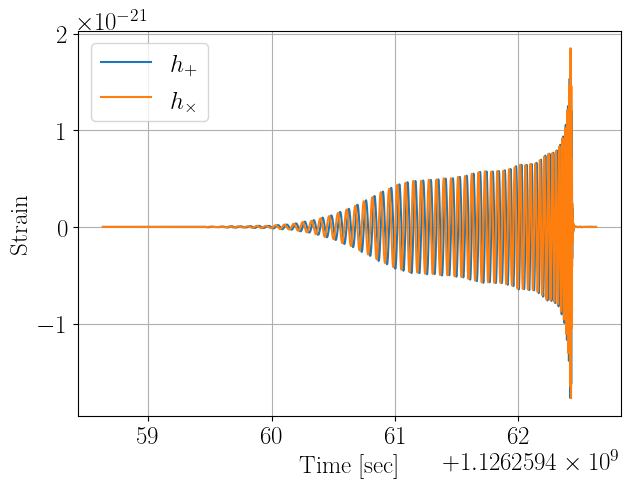

In [10]:
wf = res["pure_polarized_wfs"]["hp"]
plt.plot(wf.sample_times, wf, linestyle='-', label='$h_+$')
wf = res["pure_polarized_wfs"]["hc"]
plt.plot(wf.sample_times, wf, linestyle='-', label=r'$h_\times$')
plt.xlabel('Time [sec]')
plt.ylabel('Strain')
plt.legend(loc="upper left")
plt.grid()
plt.show()

### (ii) Zero-noise interferometer signal (`pure_ifo_signal`)

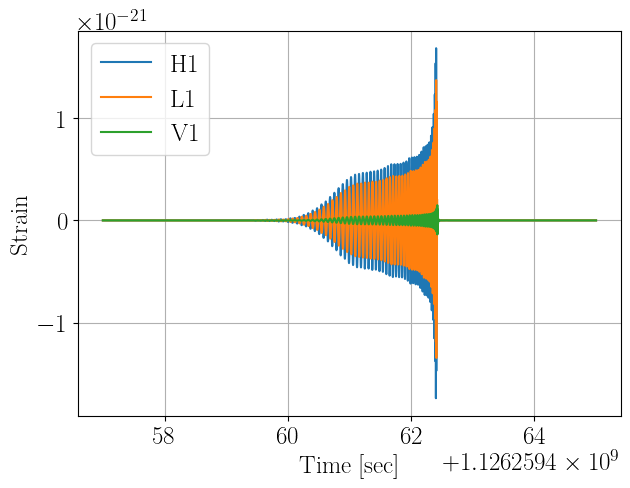

In [11]:
for ifo in params["ifo_list"]:
    wf = res["pure_ifo_signal"][ifo]
    plt.plot(wf.sample_times, wf, linestyle='-', label=ifo)
plt.xlabel('Time [sec]')
plt.ylabel('Strain')
plt.legend(loc="upper left")
plt.grid()
plt.show()

### (iii) Signal with Noise

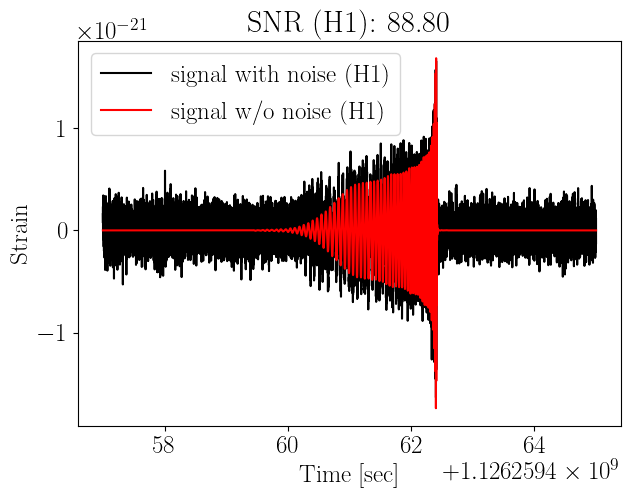

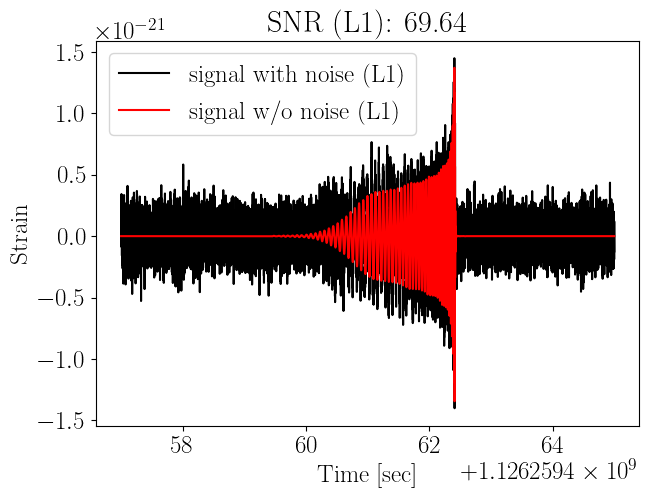

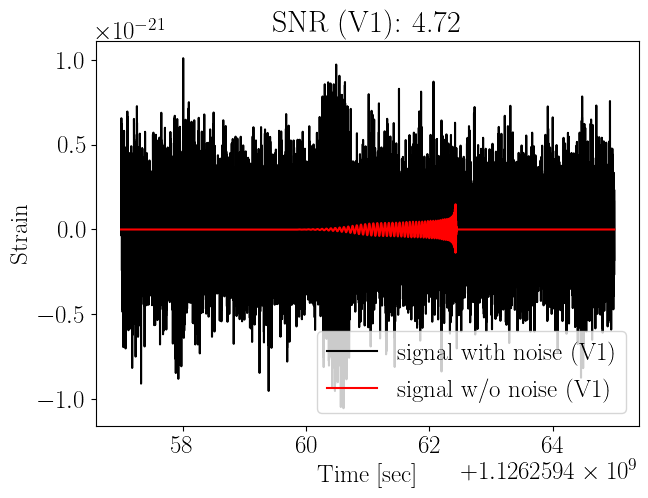

Net SNR: 112.95


In [12]:
for ifo in params['ifo_list']:
    wf_with_noise = res['noisy_ifo_signal'][ifo]
    wf_without_noise = res['pure_ifo_signal'][ifo] 
    snr_ifo = res['optimal_snr'][ifo] 

    plt.plot(wf_with_noise.sample_times, wf_with_noise, color='black', linestyle='solid', label='signal with noise ('+ifo+')')
    plt.plot(wf_without_noise.sample_times, wf_without_noise, color='red', linestyle='solid', label='signal w/o noise ('+ifo+')')   
    plt.title('SNR ('+ifo+'): {:.2f}'.format(snr_ifo))
    plt.xlabel('Time [sec]')
    plt.ylabel('Strain')
    plt.legend()
    plt.show()

net_SNR = res['network_optimal_snr']
print('Net SNR: {:.2f}'.format(net_SNR))

### (iv) Matched Filter SNR

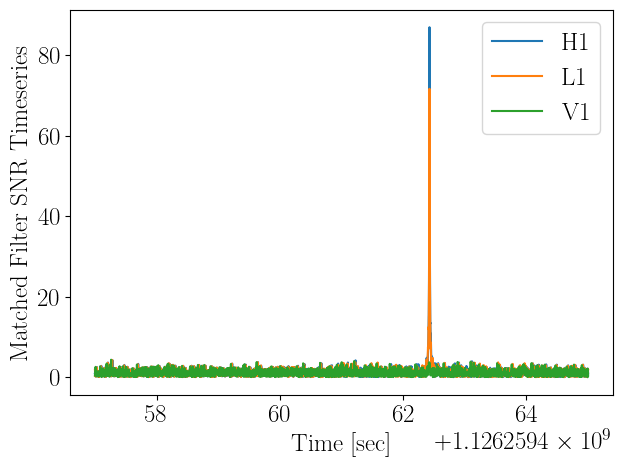

In [13]:
for ifo in params['ifo_list']:
    wf = res['matched_filter_snr_timeseries'][ifo]
    plt.plot(wf.sample_times, np.abs(wf), label=ifo)
plt.xlabel('Time [sec]')
plt.ylabel('Matched Filter SNR Timeseries')    
plt.legend()    
plt.show()    

### (v) get the full input parameters dict using `gwmat.injection.params`

In [14]:
gwmat.injection.params

{'snr_f_min': 20.0,
 'snr_f_max': 1024.0,
 'f_ref': 20.0,
 'sample_rate': 2048,
 'delta_t': 0.00048828125,
 'delta_f': None,
 'ifo_list': ['H1', 'L1', 'V1'],
 'm_lens': 0.0,
 'y_lens': 5.0,
 'z_lens': 0.0,
 'lens_mass_lower_limit': 0.001,
 'Ff_data': None,
 'ra': 0,
 'dec': 0.7,
 'rwrap': -0.1,
 'wf_domain': 'TD',
 'taper_hp_hc': True,
 'hp_hc_extra_padding_at_start': 0,
 'make_hp_hc_duration_power_of_2': True,
 'extra_padding_at_start': 1,
 'extra_padding_at_end': 2,
 'Noise': True,
 'psd_H1': 'O4',
 'psd_L1': 'O4',
 'psd_V1': 'O4',
 'noise_seed': 127,
 'is_asd_file': False,
 'psd_f_low': 20.0,
 'save_data': False,
 'data_outdir': './',
 'data_label': None,
 'data_channel': 'PyCBC-Injection',
 'cyclic_time_shift_method': 'gwmat',
 'f_start': 15,
 'wf_approximant': 'IMRPhenomXO4a',
 'mass_1': 36.899196999999994,
 'mass_2': 32.841122,
 'a_1': 0.4589379196155383,
 'a_2': 0.6217996075936105,
 'tilt_1': 1.3119020553581624,
 'tilt_2': 1.9677689908003024,
 'phi_jl': 5.066189795720256,
 'phi_

## 4. Example: Injecting GW150914-like signal in its corresponding PSD and saving the data as frame files
- for saving the data as "*.gwf" frame files, use `save_data=True`.
- We will show further capabilities of the injection script through the examples below.

get list of all the available PSDs in gwmat framework.

In [15]:
gwmat.injection.list_available_psds()

['AdV_asd.txt',
 'AdV_psd.txt',
 'Aplus_asd.txt',
 'CE_asd.txt',
 'CE_psd.txt',
 'CE_wb_asd.txt',
 'CE_wb_psd.txt',
 'ET_B_asd.txt',
 'ET_B_psd.txt',
 'ET_D_asd.txt',
 'ET_D_psd.txt',
 'GEO600_S6e_asd.txt',
 'KAGRA_design_asd.txt',
 'KAGRA_design_psd.txt',
 'LIGO_srd_asd.txt',
 'LIGO_srd_psd.txt',
 'aLIGO_O4_high_asd.txt',
 'aLIGO_O4_high_psd.txt',
 'aLIGO_ZERO_DET_high_P_asd.txt',
 'aLIGO_ZERO_DET_high_P_psd.txt',
 'aLIGO_early_asd.txt',
 'aLIGO_early_high_asd.txt',
 'aLIGO_early_high_psd.txt',
 'aLIGO_early_psd.txt',
 'aLIGO_late_asd.txt',
 'aLIGO_late_psd.txt',
 'aLIGO_mid_asd.txt',
 'aLIGO_mid_psd.txt',
 'aVirgo_O4_high_psd.txt',
 'aplus.txt',
 'gw150914_H1_psd.txt',
 'gw150914_L1_psd.txt',
 'highf_psd.txt',
 'lisa_asd.txt',
 'lisa_psd.txt']

### (i) Using recovered GW150914 parameters and PSD for signal generation.

Saving H1 data: ./H-H1_PyCBC-Injection-1126259449-16.gwf
Saving L1 data: ./L-L1_PyCBC-Injection-1126259449-16.gwf

Output of `simulate_injection_with_comprehensive_output`:

Keys: dict_keys(['pure_polarized_wfs', 'pure_ifo_signal', 'noisy_ifo_signal', 'psd', 'signal_templates', 'matched_filter_snr', 'optimal_snr', 'network_optimal_snr', 'matched_filter_snr_timeseries', 'network_matched_filter_snr'])

Output:
pure_polarized_wfs : {'hp': <pycbc.types.timeseries.TimeSeries object at 0x7facb8937e80>, 'hc': <pycbc.types.timeseries.TimeSeries object at 0x7facb8937f40>}
pure_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7facb88b9e50>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7facc1037730>}
noisy_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7facb88c65e0>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7facb88c6550>}
psd : {'H1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7facb89377c0>, 'L1': <pycbc.types.frequencyseries

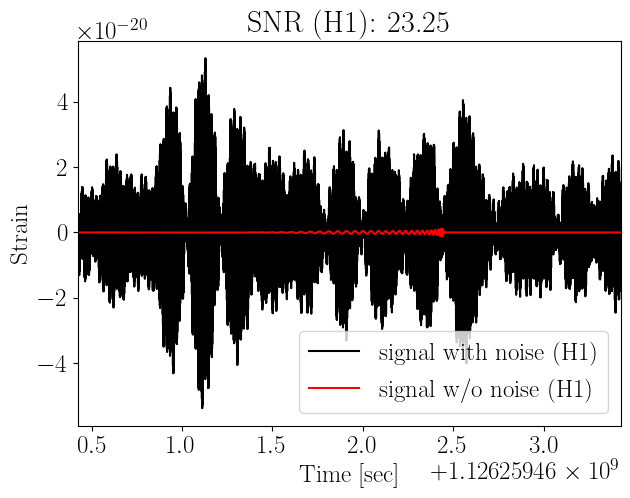

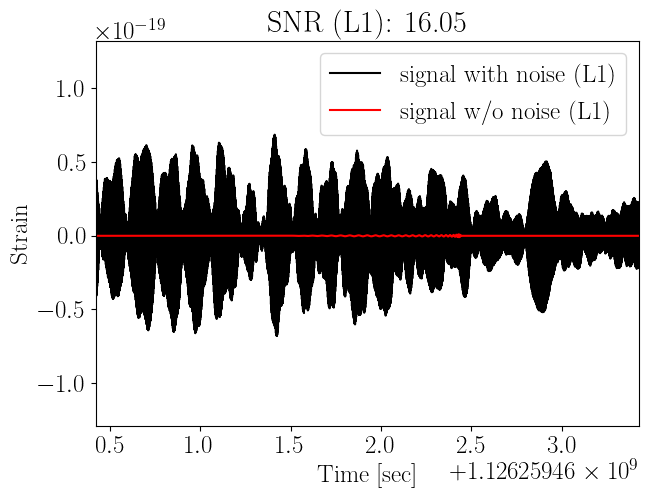

Network Optimal SNR: 28.26


In [16]:
init_params = dict(wf_domain="TD", f_start=20, snr_f_min=20., snr_f_max=None,
            f_ref=20., sample_rate=2048, delta_t=None, wf_approximant="IMRPhenomXO4a",
            ifo_list = ['H1', 'L1']) 
cbc_params =  gw150914_params
misc_params = dict(rwrap = -0.1, cyclic_time_shift_method = "gwmat",
                   taper_hp_hc=True,  hp_hc_extra_padding_at_start=4,
                   make_hp_hc_duration_power_of_2=True,
                   extra_padding_at_start=1, extra_padding_at_end=2,
                   save_data=True, data_outdir = './',
                   data_label=None, data_channel='PyCBC-Injection')
psd_params = dict(Noise=True, psd_H1="gw150914_H1_psd.txt", psd_L1="gw150914_L1_psd.txt", 
                  noise_seed=127, is_asd_file=False, psd_f_low=None)

params = {**init_params, **cbc_params, **psd_params, **misc_params}


## WF generation
res = gwmat.injection.simulate_injection_with_comprehensive_output(**params)
print("\nOutput of `simulate_injection_with_comprehensive_output`:\n")
print("Keys:", res.keys())
print("\nOutput:")
gwmat.general_utils.print_dict(res)
print("\n")

# Plots
for ifo in params['ifo_list']:
    wf_with_noise = res['noisy_ifo_signal'][ifo]
    wf_without_noise = res['pure_ifo_signal'][ifo] 
    snr_ifo = res['optimal_snr'][ifo] 

    plt.plot(wf_with_noise.sample_times, wf_with_noise, color='black', linestyle='solid', label='signal with noise ('+ifo+')')
    plt.plot(wf_without_noise.sample_times, wf_without_noise, color='red', linestyle='solid', label='signal w/o noise ('+ifo+')')   
    plt.title('SNR ('+ifo+'): {:.2f}'.format(snr_ifo))
    plt.xlabel('Time [sec]')
    plt.ylabel('Strain')
    plt.legend()
    plt.xlim(params["geocent_time"]-2, params["geocent_time"]+1)
    plt.show()

net_SNR = res['network_optimal_snr'] 
print('Network Optimal SNR: {:.2f}'.format(net_SNR))

### (ii) Generating GW150914-like injection with network_optimal_snr=100
Here, we will adjust the `luminosity_distance` to achieve a desired optiaml SNR.\
We do this in automated way using the function `gwmat.injection.network_optimal_snr_to_distance`.


Output of `simulate_injection_with_comprehensive_output`:

Keys: dict_keys(['pure_polarized_wfs', 'pure_ifo_signal', 'noisy_ifo_signal', 'psd', 'signal_templates', 'matched_filter_snr', 'optimal_snr', 'network_optimal_snr', 'matched_filter_snr_timeseries', 'network_matched_filter_snr'])

Output:
pure_polarized_wfs : {'hp': <pycbc.types.timeseries.TimeSeries object at 0x7facb88befd0>, 'hc': <pycbc.types.timeseries.TimeSeries object at 0x7facb88be3a0>}
pure_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7facb88b9670>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7facb88beee0>}
noisy_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7fac961348e0>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7fac96123fd0>}
psd : {'H1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7facb8948490>, 'L1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7facb8948550>}
signal_templates : {'H1': <pycbc.types.timeseries.TimeSeries object at

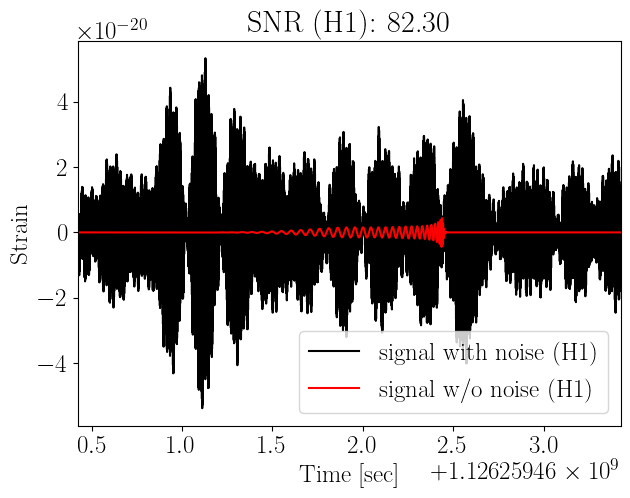

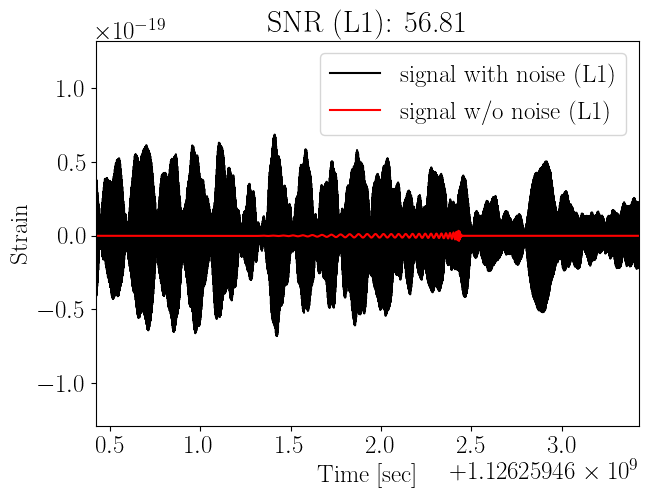

Network Optimal SNR: 100.00


In [17]:
# Computing the required distance to achieve a network SNR of 100.
params.update(save_data=False)
required_distance = gwmat.injection.network_optimal_snr_to_distance(net_optimal_snr=100, **params)
params.update(luminosity_distance=required_distance)

## WF generation
res = gwmat.injection.simulate_injection_with_comprehensive_output(**params)
print("\nOutput of `simulate_injection_with_comprehensive_output`:\n")
print("Keys:", res.keys())
print("\nOutput:")
gwmat.general_utils.print_dict(res)
print("\n")

# Plots
for ifo in params['ifo_list']:
    wf_with_noise = res['noisy_ifo_signal'][ifo]
    wf_without_noise = res['pure_ifo_signal'][ifo] 
    snr_ifo = res['optimal_snr'][ifo] 

    plt.plot(wf_with_noise.sample_times, wf_with_noise, color='black', linestyle='solid', label='signal with noise ('+ifo+')')
    plt.plot(wf_without_noise.sample_times, wf_without_noise, color='red', linestyle='solid', label='signal w/o noise ('+ifo+')')   
    plt.title('SNR ('+ifo+'): {:.2f}'.format(snr_ifo))
    plt.xlabel('Time [sec]')
    plt.ylabel('Strain')
    plt.legend()
    plt.xlim(params["geocent_time"]-2, gw150914_params["geocent_time"]+1)
    plt.show()

net_SNR = res['network_optimal_snr']  
print('Network Optimal SNR: {:.2f}'.format(net_SNR))

### (iii) Generating GW150914-like injection with network_matched_filter_snr $\simeq$ 100
Here, we will adjust the `luminosity_distance` to achieve a desired matched-filter SNR.\
We do this in automated way using the function `gwmat.injection.network_matched_filter_snr_to_distance`.


Output of `simulate_injection_with_comprehensive_output`:

Keys: dict_keys(['pure_polarized_wfs', 'pure_ifo_signal', 'noisy_ifo_signal', 'psd', 'signal_templates', 'matched_filter_snr', 'optimal_snr', 'network_optimal_snr', 'matched_filter_snr_timeseries', 'network_matched_filter_snr'])

Output:
pure_polarized_wfs : {'hp': <pycbc.types.timeseries.TimeSeries object at 0x7facb8937cd0>, 'hc': <pycbc.types.timeseries.TimeSeries object at 0x7facb8937dc0>}
pure_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7fac9611cbe0>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7facb8961e80>}
noisy_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7fac960bb4f0>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7fac960bb070>}
psd : {'H1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7facb8c31cd0>, 'L1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7fac96117ac0>}
signal_templates : {'H1': <pycbc.types.timeseries.TimeSeries object at

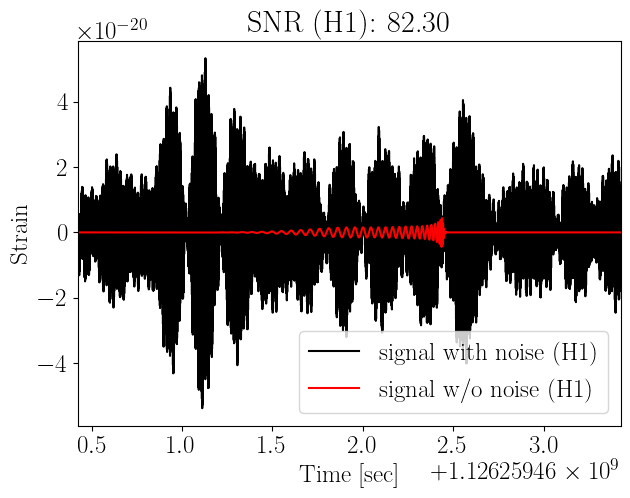

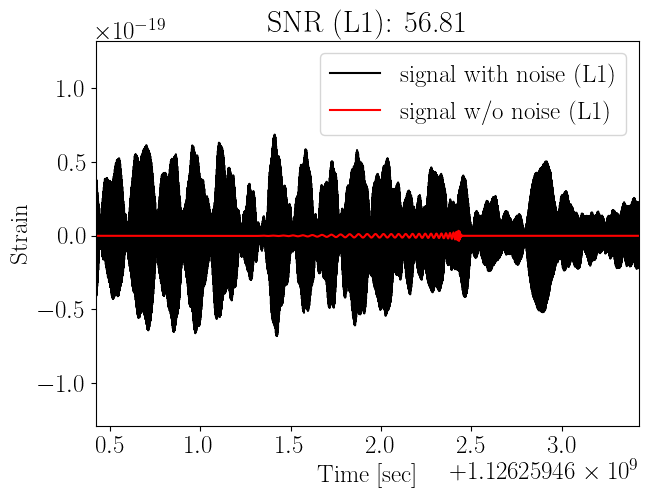

Network Matched-Filter SNR: 100.72


In [18]:
# Computing the required distance to achieve a network SNR of 100.
required_distance = gwmat.injection.network_matched_filter_snr_to_distance(net_mf_snr=100, threshold=1, **params)
params.update(luminosity_distance=required_distance)

## WF generation
res = gwmat.injection.simulate_injection_with_comprehensive_output(**params)
print("\nOutput of `simulate_injection_with_comprehensive_output`:\n")
print("Keys:", res.keys())
print("\nOutput:")
gwmat.general_utils.print_dict(res)
print("\n")

# Plots
for ifo in params['ifo_list']:
    wf_with_noise = res['noisy_ifo_signal'][ifo]
    wf_without_noise = res['pure_ifo_signal'][ifo] 
    snr_ifo = res['optimal_snr'][ifo] 

    plt.plot(wf_with_noise.sample_times, wf_with_noise, color='black', linestyle='solid', label='signal with noise ('+ifo+')')
    plt.plot(wf_without_noise.sample_times, wf_without_noise, color='red', linestyle='solid', label='signal w/o noise ('+ifo+')')   
    plt.title('SNR ('+ifo+'): {:.2f}'.format(snr_ifo))
    plt.xlabel('Time [sec]')
    plt.ylabel('Strain')
    plt.legend()
    plt.xlim(params["geocent_time"]-2, params["geocent_time"]+1)
    plt.show()

net_SNR = res['network_matched_filter_snr']
print('Network Matched-Filter SNR: {:.2f}'.format(net_SNR))

### (iv) Computing the Inspiral and PostInspiral SNR of GW150914
One can compute the SNR for different frequency bins by using `snr_f_min` and `snr_f_max` values. This does not affect `f_start`, the starting frequency of WF generation.

In [19]:
# Computing frequency at ISCO
params.update(luminosity_distance=gw150914_params["luminosity_distance"])
f_isco = gwmat.gw_utils.gw_frequency_at_kerr_isco_from_bbh_params(**params)["f_ISCO_prograde"]
print(f"ISCO frequency: {f_isco:.2f} Hz")

# Computing the SNR in the Inspiral Regime, i.e., in the frequency range (20, f_isco).
params.update(snr_f_min=20, snr_f_max=f_isco, save_data=False)
res = gwmat.injection.simulate_injection_with_comprehensive_output(**params)
print('Network Optimal SNR in the Inspiral: {:.2f}'.format(res['network_optimal_snr']))

# Computing the SNR in the Post-Inspiral Regime, i.e., in the frequency range (f_isco, nyquist_frequency).
params.update(snr_f_min=f_isco, snr_f_max=None, save_data=False)
res = gwmat.injection.simulate_injection_with_comprehensive_output(**params)
print('Network Optimal SNR in the Post-Inspiral: {:.2f}'.format(res['network_optimal_snr']))

ISCO frequency: 135.18 Hz


Network Optimal SNR in the Inspiral: 23.12


Network Optimal SNR in the Post-Inspiral: 16.25
